In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
bfvdb_file = "./bfvd_metadata.tsv"
col_names = ["uniprot_id", "pdb_name", "protein_len", "plddt", "ptm", "split"]
bfvdb = pd.read_csv(bfvdb_file, sep="\t", names=col_names)

In [6]:
bfvdb

,uniprot_id,pdb_name,protein_len,plddt,ptm,split
0,A0A2P1GMZ4,A0A2P1GMZ4_1_unrelaxed_rank_001_alphafold2_ptm...,1481,28.979,0.26,1
1,A0A2P1GMZ4,A0A2P1GMZ4_2_unrelaxed_rank_001_alphafold2_ptm...,1481,43.168,0.31,1
2,A0A2P1GMZ4,A0A2P1GMZ4_3_unrelaxed_rank_001_alphafold2_ptm...,1481,60.193,0.30,1
3,A0A2P1GMZ4,A0A2P1GMZ4_4_unrelaxed_rank_001_alphafold2_ptm...,1481,77.229,0.63,1
4,A0A2P1GMZ4,A0A2P1GMZ4_5_unrelaxed_rank_001_alphafold2_ptm...,1484,77.320,0.45,1
...,...,...,...,...,...,...
351237,U5JV40,U5JV40_unrelaxed_rank_001_alphafold2_ptm_model...,8,72.735,0.05,0
351238,Q83349,Q83349_unrelaxed_rank_001_alphafold2_ptm_model...,8,73.672,0.05,0
351239,A0A515KW57,A0A515KW57_unrelaxed_rank_001_alphafold2_ptm_m...,8,72.585,0.05,0
351240,B6CXL3,B6CXL3_unrelaxed_rank_001_alphafold2_ptm_model...,8,77.751,0.05,0


In [35]:
viro3d_file = "~/2_protein_structure_prediction/virosphere-fold-v1_predicted_dataset.csv"
viro3d = pd.read_csv(viro3d_file)

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

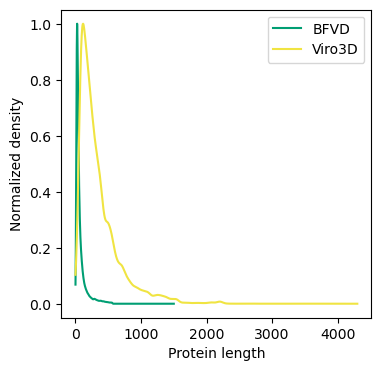

In [67]:
# Assuming df_meta is your DataFrame and it has columns 'Pfam_annotation_probability' and 'Pfam_annotation_type'
# Split the data based on 'Pfam_annotation_type'
data1 = viro3d["protlen"]
data2 = bfvdb["protein_len"]

# Compute KDE
kde1 = gaussian_kde(data1)
kde2 = gaussian_kde(data2)

# Create a range of values for the x-axis
x1 = np.linspace(0, 4300, 1000)
x2 = np.linspace(0, 1500, 1000)

# Compute the densities
density1 = kde1(x)
density2 = kde2(x)

# Normalize the densities
density1 /= density1.max()
density2 /= density2.max()

# Plot the normalized densities
plt.figure(figsize=(4, 4))
plt.plot(x2, density2, label='BFVD', color='#009E73')
plt.plot(x1, density1, label='Viro3D', color='#F0E442')
plt.xlabel('Protein length')
plt.ylabel('Normalized density')
plt.legend()
plt.savefig(f'./figures/viro3d_bfvd_protein_length_normalised_kde.svg', bbox_inches='tight', format='svg')
#plt.savefig(f'./figures/go_{analysis}_annotation_probability_kde.png', dpi=600, bbox_inches='tight')
plt.show()

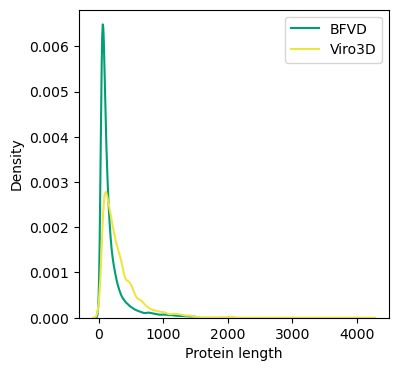

In [65]:
plt.figure(figsize=(4, 4))
sns.kdeplot(bfvdb["protein_len"], label='BFVD', color='#009E73')
sns.kdeplot(viro3d["protlen"], label='Viro3D', color='#F0E442')
plt.xlabel('Protein length')
plt.ylabel('Density')
plt.legend()
plt.savefig(f'./figures/viro3d_bfvd_protein_length_kde.svg', bbox_inches='tight', format='svg')
#plt.savefig(f'./figures/go_{analysis}_annotation_probability_kde.png', dpi=600, bbox_inches='tight')
plt.show()

In [70]:
viro3d["protlen"].median()

237.0

In [68]:
viro3d["protlen"].describe()

count    85162.000000
mean       330.189063
std        302.532815
min         11.000000
25%        129.000000
50%        237.000000
75%        428.000000
max       4186.000000
Name: protlen, dtype: float64

In [71]:
bfvdb["protein_len"].median()

110.0

In [69]:
bfvdb["protein_len"].describe()

count    351242.000000
mean        191.895761
std         227.040181
min           5.000000
25%          66.000000
50%         110.000000
75%         212.000000
max        1501.000000
Name: protein_len, dtype: float64

In [2]:
viro3d_vs_bfvdb_file = "./foldseek_Viro3D_vs_BFVDB.tsv" # Foldseek file (size is over 3.5 GB)
viro3d_vs_bfvdb = pd.read_csv(viro3d_vs_bfvdb_file, sep="\t")

In [3]:
viro3d_vs_bfvdb_small = viro3d_vs_bfvdb[viro3d_vs_bfvdb['evalue'] < 1e-5]
viro3d_vs_bfvdb_small = viro3d_vs_bfvdb_small[viro3d_vs_bfvdb_small['fident'] >= 0.95]
viro3d_vs_bfvdb_small = viro3d_vs_bfvdb_small[viro3d_vs_bfvdb_small['qcov'] >= 0.95]
viro3d_vs_bfvdb_small = viro3d_vs_bfvdb_small.sort_values(by=["query", "evalue"], ascending=True)
viro3d_vs_bfvdb_small = viro3d_vs_bfvdb_small.drop_duplicates(subset="query", keep="first").reset_index(drop=True)

In [ ]:
viro3d_vs_bfvdb_small

,query,target,fident,alnlen,mismatch,gapopen,qstart,qend,qlen,qcov,tstart,tend,tlen,tcov,evalue,bits,prob,lddt,alntmscore
0,CF-AAA03189.1.3_6577_relaxed,Q9YWL2_unrelaxed_rank_001_alphafold2_ptm_model...,0.968,159,5,0,1,159,160,0.994,123,281,491,0.324,1.927000e-18,379,1.0,0.6185,0.35700
1,CF-AAA42424.1_12244_relaxed,UPI00001D96C2_unrelaxed_rank_001_alphafold2_pt...,1.000,198,0,0,1,198,200,0.990,1,198,253,0.783,4.633000e-23,289,1.0,0.4545,0.23930
2,CF-AAA42433.1_12244_relaxed,P19720_unrelaxed_rank_001_alphafold2_ptm_model...,1.000,161,0,0,1,161,161,1.000,1,161,161,1.000,1.193000e-22,954,1.0,0.9991,0.98920
3,CF-AAA42854.1.1.10_7240_relaxed,A0A068L6J0_2_unrelaxed_rank_001_alphafold2_ptm...,0.982,579,10,0,1,579,579,1.000,825,1403,1406,0.412,6.541000e-99,4146,1.0,0.9347,0.96890
4,CF-AAA42854.1.1.3_7240_relaxed,Q86756_unrelaxed_rank_001_alphafold2_ptm_model...,0.966,59,2,0,1,59,59,1.000,107,165,307,0.192,5.307000e-06,161,1.0,0.6442,0.63880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12712,EF-SMG83459.1_12143_relaxed,A0A1X7MPK1_unrelaxed_rank_001_alphafold2_ptm_m...,0.979,771,0,2,1,763,763,1.000,1,763,763,1.000,3.957000e-50,383,1.0,0.3764,0.07689
12713,EF-UHK03162.1_8681_relaxed,A0A8K1XB13_unrelaxed_rank_001_alphafold2_ptm_m...,1.000,293,0,0,1,293,293,1.000,1,293,293,1.000,1.995000e-31,496,1.0,0.6270,0.30220
12714,EF-YP_009215.1_12256_relaxed,Q3HS73_unrelaxed_rank_001_alphafold2_ptm_model...,1.000,225,0,0,1,225,225,1.000,1,225,225,1.000,1.252000e-23,450,1.0,0.7188,0.32030
12715,EF-YP_009218.1_12256_relaxed,UPI00001D96D8_unrelaxed_rank_001_alphafold2_pt...,1.000,250,0,0,1,250,250,1.000,1,250,250,1.000,3.559000e-32,466,1.0,0.7044,0.26740


In [ ]:
# Viro3D (85,162)
# BFVDB (351,242)
# NomburgDB (67,715)

In [5]:
85162 - 12717

72445

In [6]:
351242 - 12717

338525

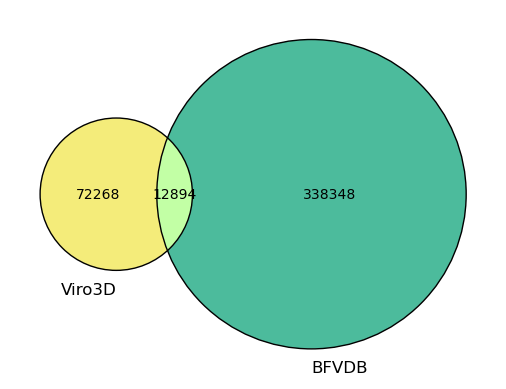

In [25]:
# import modules 
from matplotlib_venn import venn2,venn2_circles 
from matplotlib import pyplot as plt 

# depict venn diagram 
venn2(
    subsets = (72268, 338348, 12894), 
	set_labels = ('Viro3D', 'BFVDB'), 
	set_colors=("#F0E442", "#009E73"),
    alpha=0.7)

# add outline 
venn2_circles(
    subsets=(72268, 338348, 12894),
    linestyle="solid",
    linewidth=1) 

plt.savefig("Viro3D_vs_BFVD_venn_diagram.svg", format="svg")
plt.show()

In [7]:
viro3d_vs_nomdburgdb_file = "./foldseek_Viro3D_vs_NomburgDB.tsv" # Foldseek file (size is over 3.7 GB)
viro3d_vs_nomdburgdb = pd.read_csv(viro3d_vs_nomdburgdb_file, sep="\t")

In [8]:
viro3d_vs_nomdburgdb_small = viro3d_vs_nomdburgdb[viro3d_vs_nomdburgdb['evalue'] < 1e-5]
viro3d_vs_nomdburgdb_small = viro3d_vs_nomdburgdb_small[viro3d_vs_nomdburgdb_small['fident'] >= 0.95]
viro3d_vs_nomdburgdb_small = viro3d_vs_nomdburgdb_small[viro3d_vs_nomdburgdb_small['qcov'] >= 0.95]
viro3d_vs_nomdburgdb_small = viro3d_vs_nomdburgdb_small.sort_values(by=["query", "evalue"], ascending=True)
viro3d_vs_nomdburgdb_small = viro3d_vs_nomdburgdb_small.drop_duplicates(subset="query", keep="first").reset_index(drop=True)

In [9]:
viro3d_vs_nomdburgdb_small

,query,target,fident,alnlen,mismatch,gapopen,qstart,qend,qlen,qcov,tstart,tend,tlen,tcov,evalue,bits,prob,lddt,alntmscore
0,CF-AAA02739.1.1.10_7195_relaxed,RNA-dependent_RNA_polymerase__NP_775524__Powas...,1.000,233,0,0,2,234,235,0.991,9,241,903,0.258,4.485000e-43,1628,1.0,0.9246,0.9881
1,CF-AAA02739.1.1.11_7195_relaxed,RNA-dependent_RNA_polymerase__NP_775524__Powas...,1.000,634,0,0,2,635,635,0.998,257,890,903,0.702,2.188000e-97,4430,1.0,0.8911,0.9633
2,CF-AAA02739.1.1.2_7195_relaxed,matrix_protein_M__NP_775515__Powassan_virus__1...,1.000,75,0,0,1,75,75,1.000,1,75,75,1.000,9.021000e-10,342,1.0,0.8995,0.7439
3,CF-AAA02739.1.1.3_7195_relaxed,envelope_protein__NP_775516__Powassan_virus__1...,1.000,299,0,0,2,300,300,0.997,3,301,497,0.602,3.774000e-55,2373,1.0,0.9441,0.9637
4,CF-AAA02739.1.1.4_7195_relaxed,envelope_protein__NP_775516__Powassan_virus__1...,1.000,86,0,0,1,86,86,1.000,311,396,497,0.173,1.046000e-11,529,1.0,0.9038,0.9433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37851,EF-SCO83617.1_57_relaxed,ubiquitin_E3_ligase_ICP0__YP_009342410__Spheni...,1.000,433,0,0,1,433,433,1.000,1,433,433,1.000,3.574000e-52,803,1.0,0.6065,0.2312
37852,EF-SCO83638.1_57_relaxed,envelope_glycoprotein_G__YP_009342419__Sphenis...,1.000,461,0,0,1,461,461,1.000,1,461,461,1.000,1.637000e-61,1086,1.0,0.5862,0.3401
37853,EF-SCO83640.1_57_relaxed,envelope_glycoprotein_J__YP_009342420__Sphenis...,1.000,611,0,0,1,611,611,1.000,1,611,611,1.000,7.617000e-70,1358,1.0,0.6260,0.2962
37854,EF-SMG83459.1_12143_relaxed,fiber__YP_009704141__Bottlenose_dolphin_adenov...,1.000,763,0,0,1,763,763,1.000,1,763,763,1.000,5.900000e-95,1935,1.0,0.6838,0.3113


In [10]:
67715 - 37856

29859

In [11]:
85162 - 37856

47306

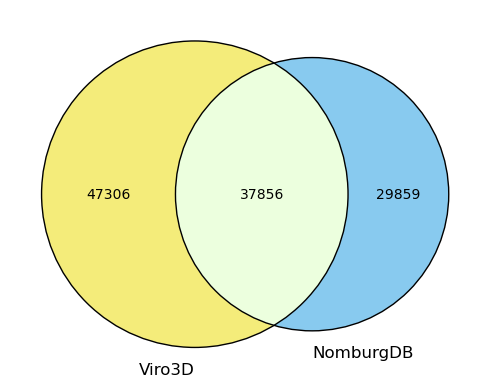

In [13]:
# import modules 
from matplotlib_venn import venn2,venn2_circles 
from matplotlib import pyplot as plt 

# depict venn diagram 
venn2(
    subsets = (47306, 29859, 37856), 
	set_labels = ('Viro3D', 'NomburgDB'), 
	set_colors=("#F0E442", "#56B4E9"),
    alpha=0.7)

# add outline 
venn2_circles(
    subsets=(47306, 29859, 37856),
    linestyle="solid",
    linewidth=1) 

plt.savefig("Viro3D_vs_NomburgDB_Venn_diagram.svg", format="svg")
plt.show()